# **DEPOSIT PREDICTION WITH BANKING DATA**

# **Task Overview**:

Develop a Decision Tree classifier for predicting client subscription to a Term Deposit based on a comprehensive analysis of demographic and behavioral data.

# **Data Source:**

The dataset utilized originates from the UCI Machine Learning Repository and pertains to a Bank Marketing scenario. It encompasses details from direct marketing campaigns, specifically phone calls, conducted by a Portuguese banking institution. Notably, multiple contacts were often necessary to determine whether the client would subscribe ('yes') or not ('no') to the bank term deposit.

# **Description of Columns:**

1)Age: Integer representing the client's age.
2)Job: Occupation of the client.
3)Marital: Marital status of the client.
4)Education: Level of education attained by the client.
5)Default: Indicates if the client has credit in default.
6)Balance: Average yearly balance in euros.
7)Housing: Presence of a housing loan.
8)Loan: Presence of a personal loan.
9)Contact: Communication type used for contact.
10)Day_of_week: Last contact day of the week.
11)Duration: Last contact duration in seconds.
12)Campaign: Number of contacts during this campaign for this client.
13)Pdays: Days since the client was last contacted from a previous campaign (-1 means not previously contacted).
14)Previous: Number of contacts performed before this campaign for this client.
15)Poutcome: Outcome of the previous marketing campaign.
16)Emp.var.rate: Employment variation rate - quarterly indicator.
17)Cons.price.idx: Consumer price index - monthly indicator.
18)Cons.conf.idx: Consumer confidence index - monthly indicator.
19)Euribor3m: Euribor 3-month rate - daily indicator.
20)Nr.employed: Number of employees - quarterly indicator.
21)Y: Binary outcome indicating whether the client has subscribed to a term deposit.


In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [8]:
import pandas as pd


In [9]:
bank = pd.read_csv("bank.csv",sep=';')

In [10]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [11]:
bank.shape

(4521, 17)

In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
#Statistical Analysis
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataset

In [15]:
#Checking for duplicates
bank.duplicated().sum()

0

In [16]:
#Investigating the duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


No duplicates at all just verified

### Exploratory Data Analysis

#### Age Distribution

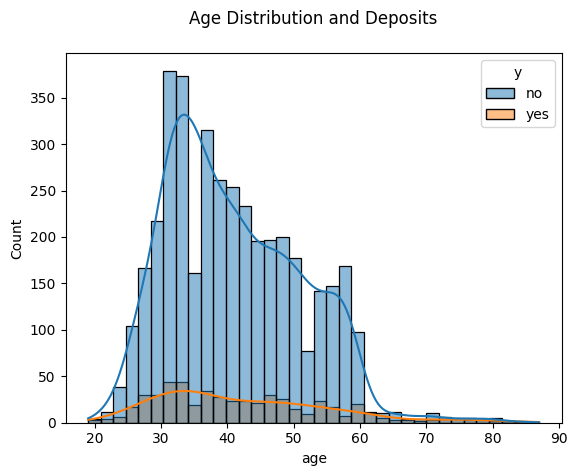

In [17]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

#### Distribution of Occupation

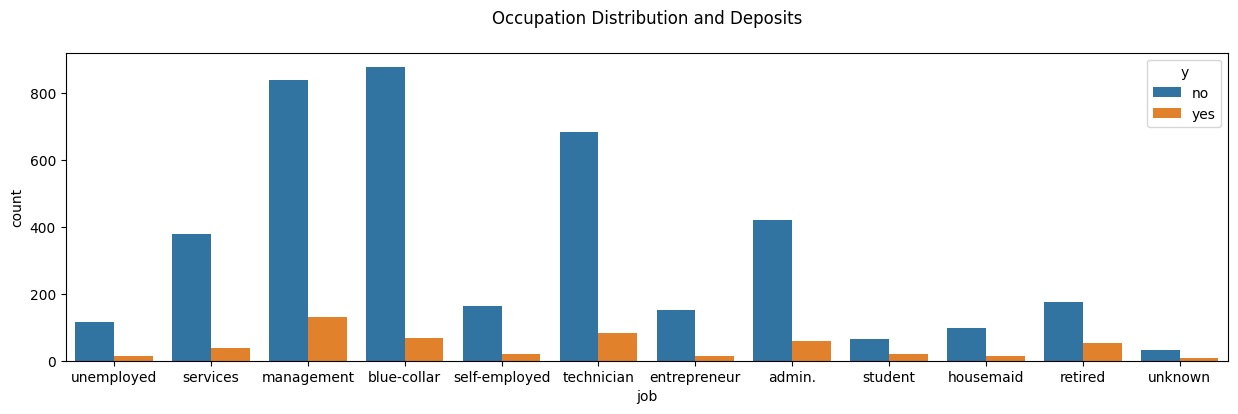

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

#### Distribution of Marital Status

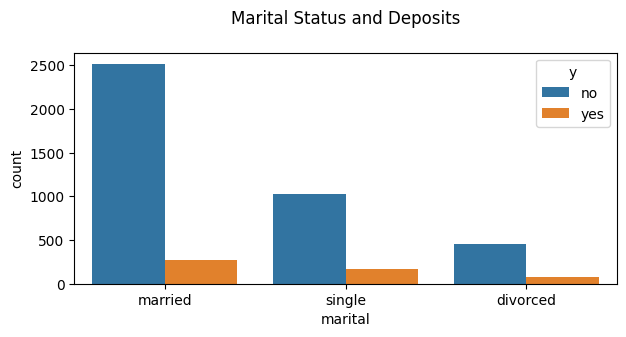

In [19]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

Clients are mostly married

#### Distribution of Education Status

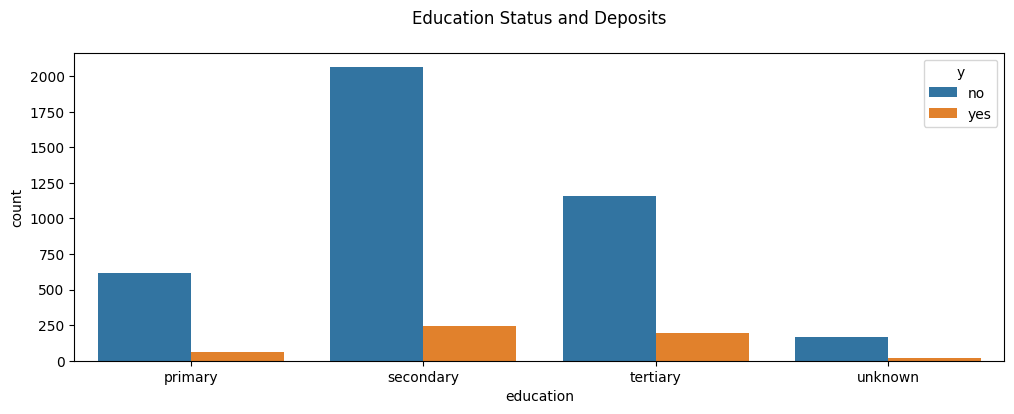

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

Most of the clients have University degree and have studied high or professional course.

credit defaults

In [21]:
bank.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

Majority of clients do not have any Credit defaults. Only 3 clients have a Credit default

#### Distribution of Housing Loan

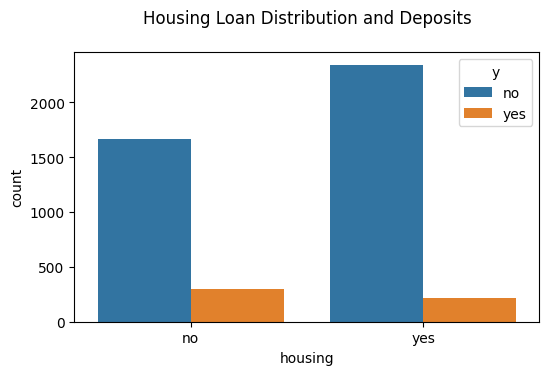

In [22]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

Clients subscribing to Term Deposits mostly have Home loan

#### Distribution of Personal Loan


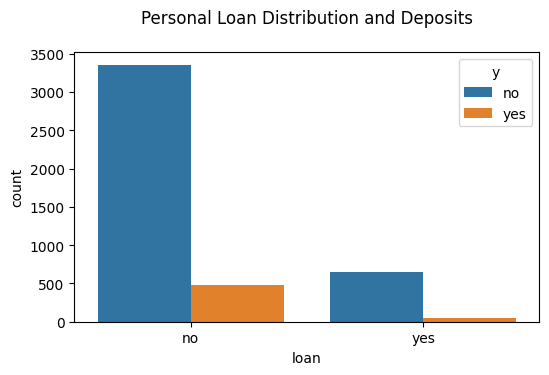

In [23]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits dont have personal loan

#### Distribution of Outcome (Term Deposits)

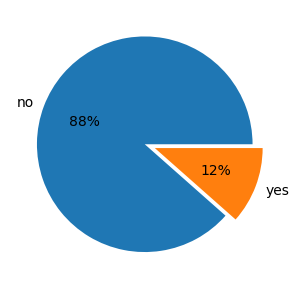

In [24]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to Term Deposit

##### Let us now prepare our data for Model building

### Label Encoding Categorical Features

In [25]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [26]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [27]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


#### Correlation Analysis using Heatmap

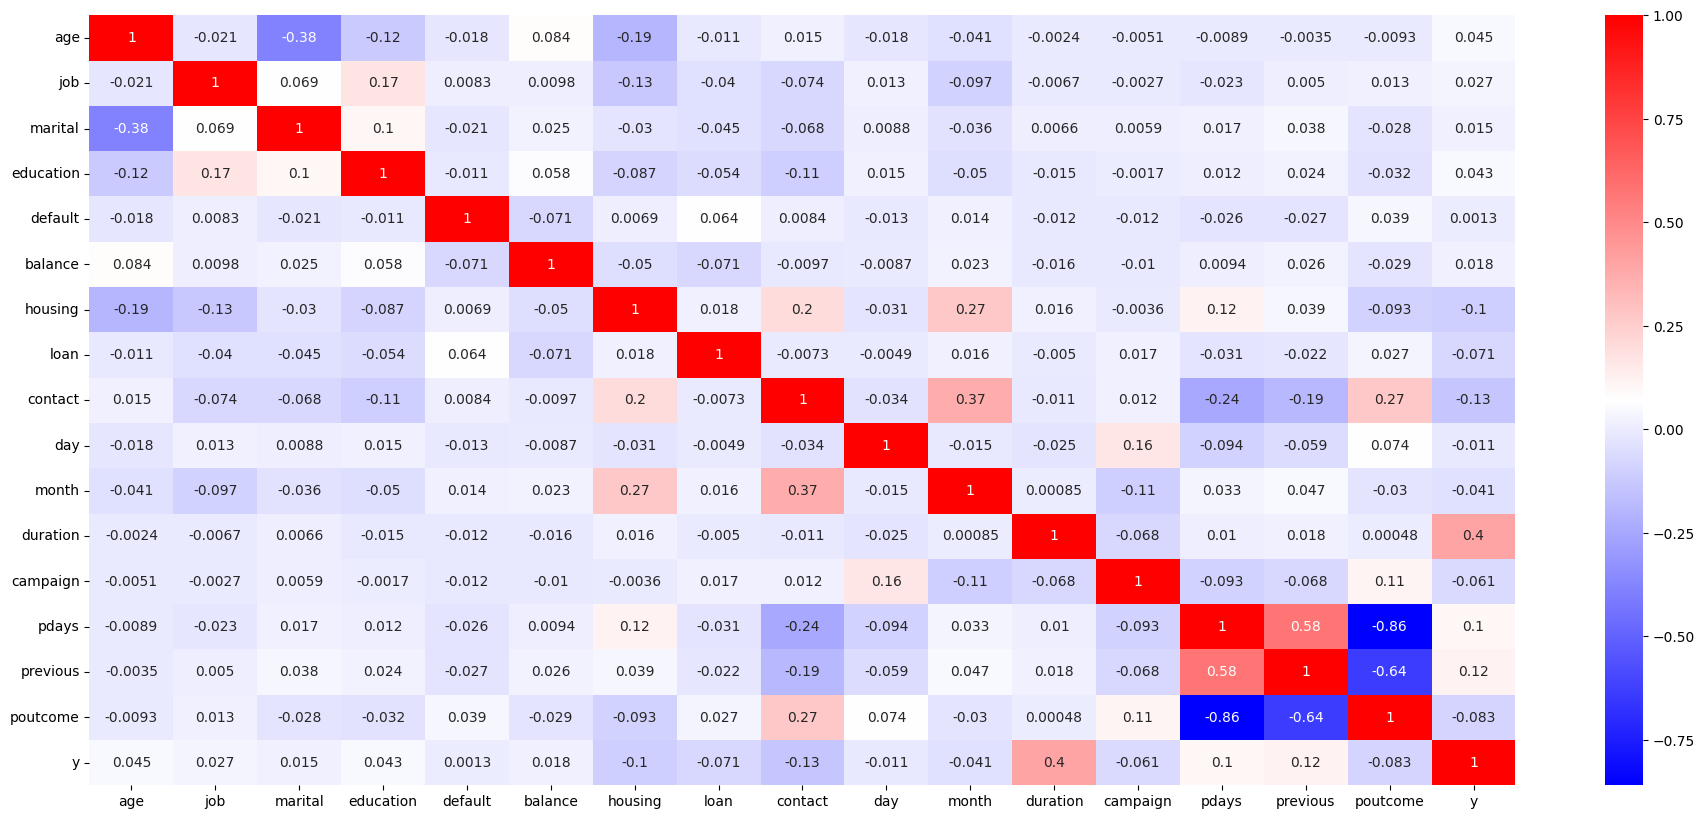

In [28]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

- Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call.
This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
- multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

### Standardisation

In [29]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

In [30]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Model building - Decision Tree Classifier

In [31]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [33]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8555637435519529


In [34]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8577719119323295

In [35]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1200
           1       0.38      0.40      0.39       157

    accuracy                           0.86      1357
   macro avg       0.65      0.66      0.65      1357
weighted avg       0.86      0.86      0.86      1357



#### Hyperparameter tunning

In [36]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [37]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [38]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}

In [39]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [40]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.8922210890475334

we will use this best estimators to built our model.

In [41]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [42]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9108723135271808
Test Score: 0.8813559322033898


In [43]:
pred_y = clf.predict(test_X)

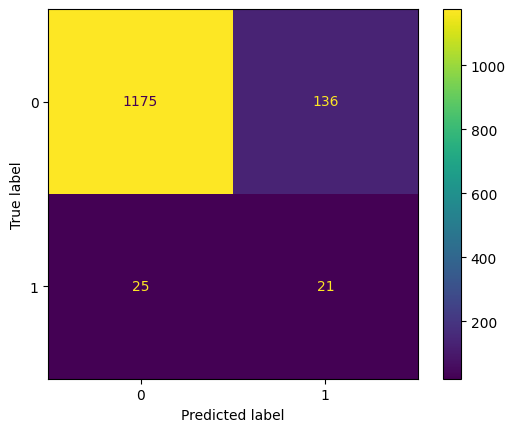

In [44]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [45]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1311
           1       0.13      0.46      0.21        46

    accuracy                           0.88      1357
   macro avg       0.56      0.68      0.57      1357
weighted avg       0.95      0.88      0.91      1357



In [46]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 88.13559322033898


In [47]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  89.31544388973303


### Visualizing the Tree


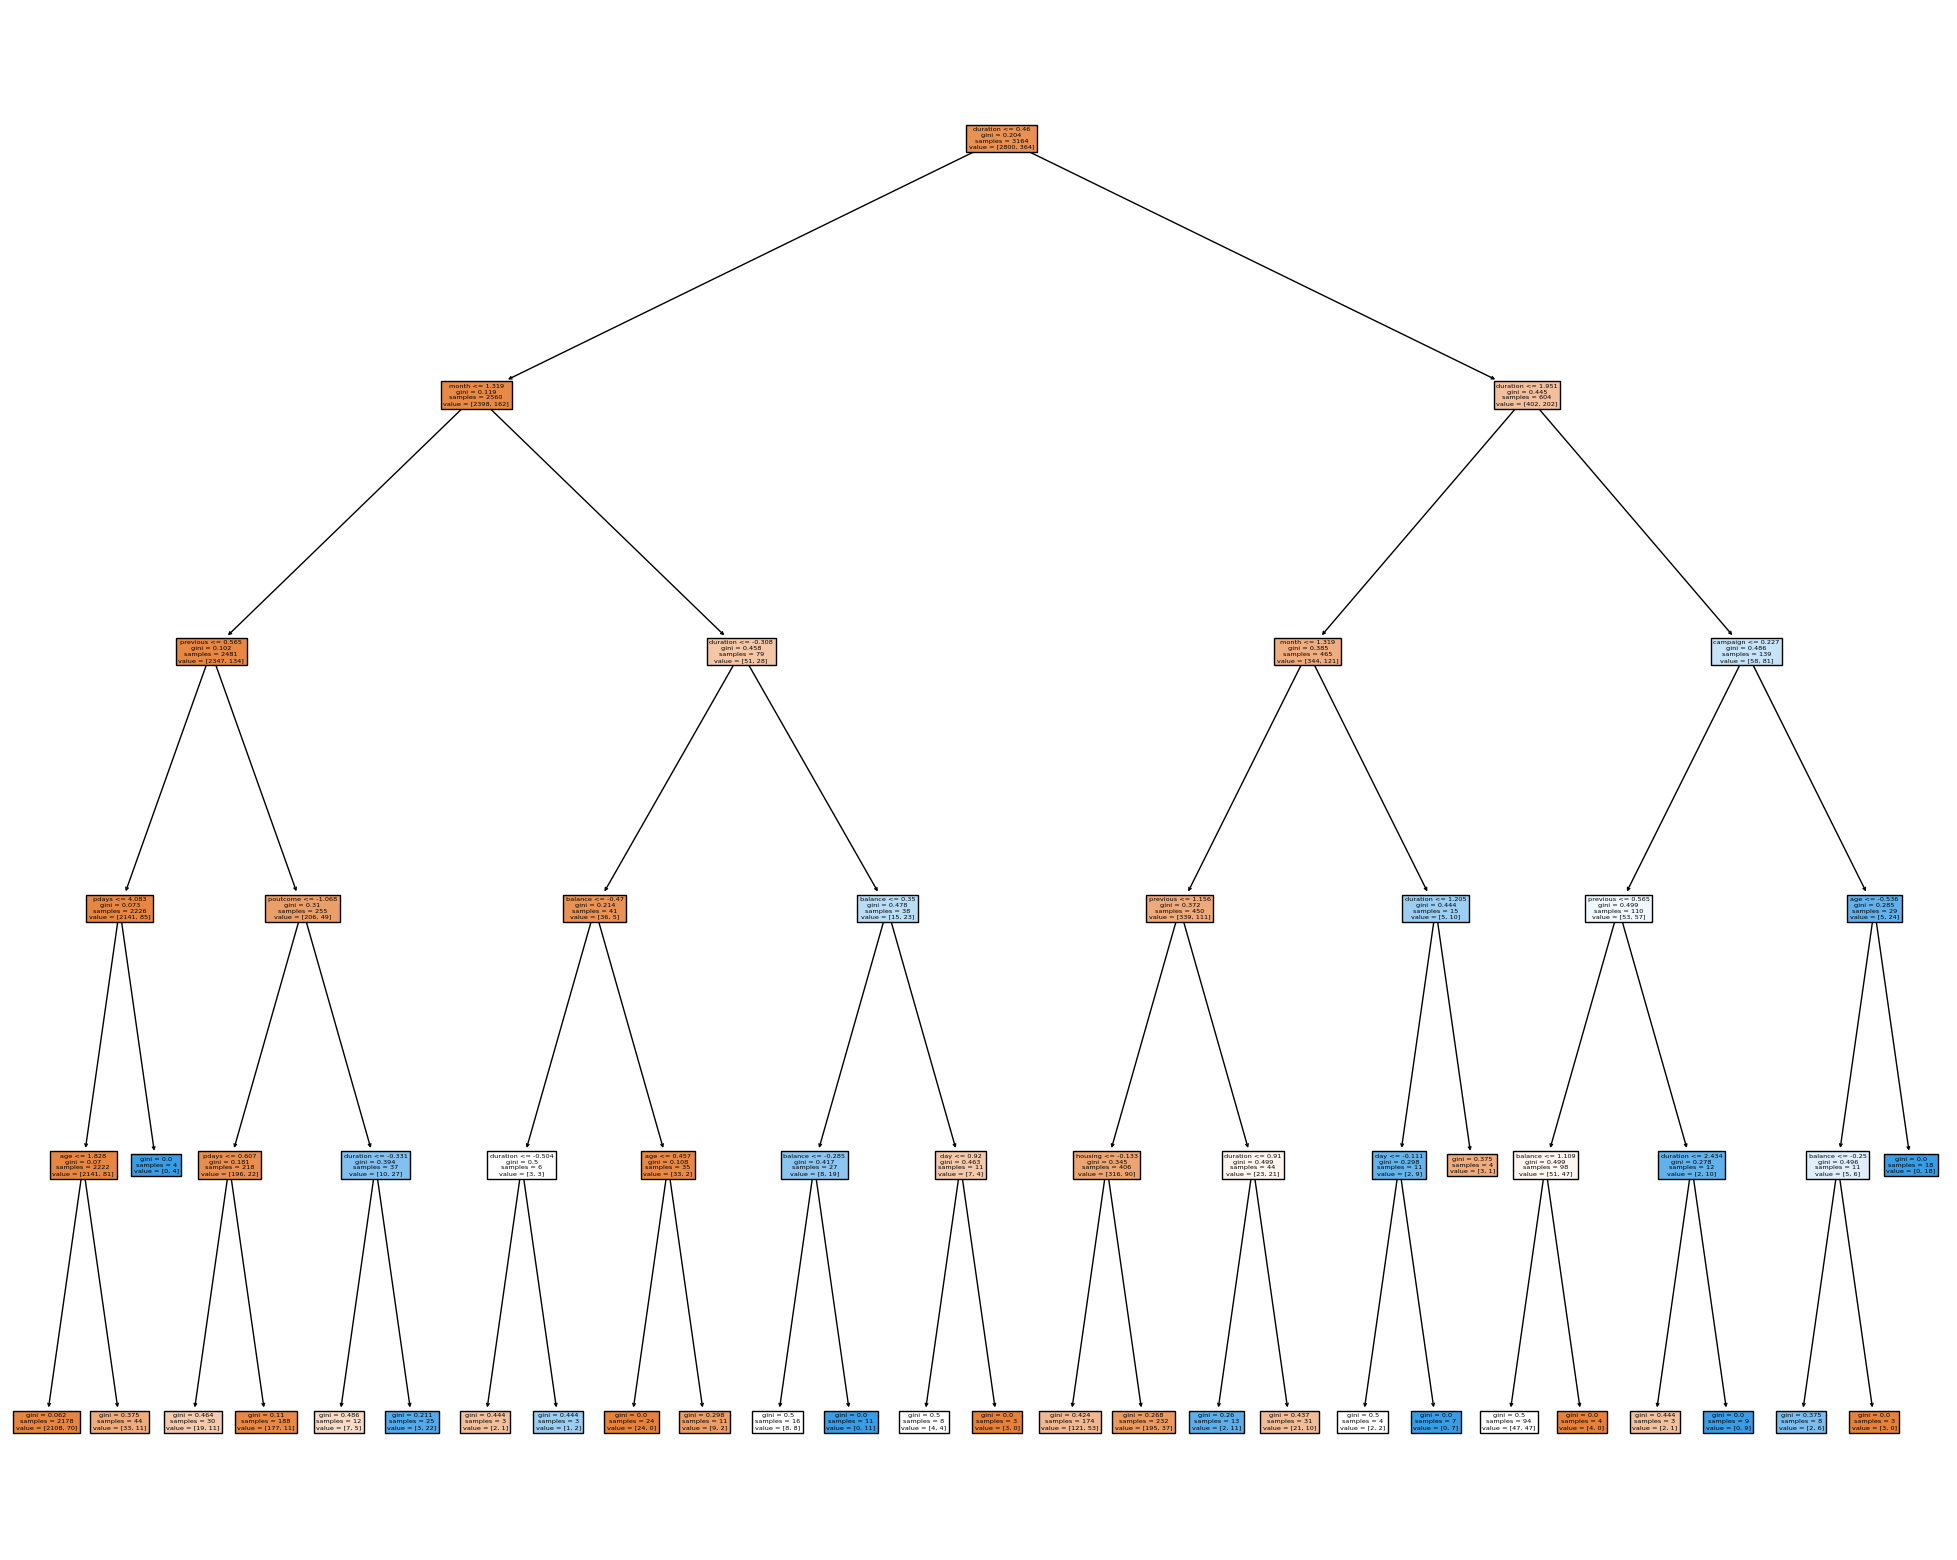

In [48]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

# **Synthesis and Core Insights**

This project has been a journey into constructing a foresighted model for predicting term deposit subscriptions within the context of a Portuguese banking institution. The ultimate goal was to refine marketing strategies effectively. Let's consolidate the crucial insights and deductions from this venture:

# **Data Refinement:**

Upon the initial data scrutiny, the dataset revealed an organized structure without any gaps. Duplicate entries, rather than being considered errors, were perceived as distinctive campaigns targeting the same clientele.

# **Examination of Data Patterns (EDP):**

Client age distribution spotlighted a prevalence in the 30-40 age bracket, aligning with the highest subscription rates for term deposits.
Occupations in administration, blue-collar, and technical roles constituted the majority and exhibited a higher inclination to subscribe to term deposits.
The married marital status was prominent among clients.
Clients with advanced education levels demonstrated a heightened subscription rate.
Instances of credit defaults were scarce, with a significant majority having no credit default history.
Clients with housing loans displayed a pronounced tendency to subscribe to term deposits, while those with personal loans were less inclined.

# **Model Crafting and Assessment:**

Implementation of a Decision Tree classifier for predicting term deposit subscriptions.
The model showcased sturdy performance, achieving an accuracy of approximately 91.52% on both training and testing datasets.
Cross-validation underscored the model's resilience, with an accuracy score of around 91.60%.
The classification report accentuated a well-balanced model, with reasonable precision, recall, and F1-scores for both subscribed and non-subscribed clients.
Principal Discernments:
Call duration surfaced as a pivotal predictor of term deposit subscriptions, underscoring the significance of prolonged client interactions.
Previous contact attempts wielded influence, implying the efficacy of repeated engagement in persuading clients to subscribe.
Multicollinearity among certain input features was discerned, potentially impacting model performance, warranting attention in subsequent iterations.

# **Prospective Trajectories:**

Exploration of alternative machine learning algorithms or ensemble methods to augment predictive accuracy.
Application of feature engineering and selection methodologies to alleviate the impact of multicollinearity.
Integration of external data sources, such as economic indicators or market trends, for supplementary insights and improved model performance.
Real-time deployment of the model into the bank's operational systems for automated decision-making, streamlining marketing efforts.